In [1]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from xgboost import plot_importance
from sklearn.utils import compute_sample_weight
from sklearn.metrics import average_precision_score
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

import optuna
import numpy as np
import lightgbm as lgb

In [5]:
y = np.load('ml_data/BeSa/y.npy')

In [8]:
y.shape

(82799,)

In [13]:
y10 = y[:82790].reshape(-1, 10).sum(axis=-1)
y60 = y[:82740].reshape(-1, 60).sum(axis=-1)

In [18]:
import scipy.io as sio

# collect arrays in dictionary
savedict = {
    '1s_windows' : y,
    '10s_windows' : y10,
    '60s_windows' : y60
}

# save to disk
sio.savemat('ied_counts.mat', savedict)

In [16]:
#load from disk
data = sio.loadmat('test.mat')

In [17]:
data

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Jan 23 18:24:04 2022',
 '__version__': '1.0',
 '__globals__': [],
 '1s_windows': array([[0, 0, 0, ..., 0, 0, 0]]),
 '10s_windows': array([[0, 0, 1, ..., 0, 1, 1]]),
 '60s_windows': array([[ 8, 14, 11, ...,  0,  0,  1]])}

In [45]:
X = np.load('ml_data/DaKa/X.npy')
y = np.load('ml_data/DaKa/y.npy')

# X = np.load('ml_data/BeSa/X.npy')
# y = np.load('ml_data/BeSa/y.npy')

# Last hour is test set. Ignore previous hour.
X_train, X_test = X[:-7200], X[-3600:]
y_train, y_test = y[:-7200], y[-3600:]

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, shuffle=True)

In [46]:
def add_detections(X, y, seconds_list=[60, 360]):
    
    X_features_list = [X]
    
    for seconds in seconds_list:
        y_detections = y[:seconds * (len(y) // seconds)].reshape(-1, seconds).sum(axis=-1)
        X_features_list.append(np.append(np.array([0] * seconds), np.repeat(y_detections, seconds))[:len(y)][:, np.newaxis])        

    return np.concatenate(X_features_list, axis=1)

X_train_detected = add_detections(X_train, y_train, seconds_list=[10, 60])
X_val_detected = add_detections(X_val, y_val, seconds_list=[10, 60])
X_test_detected = add_detections(X_test, y_test, seconds_list=[10, 60])

In [3]:
model.feature_importances_.reshape(-1, 2).mean(axis=0)

NameError: name 'model' is not defined

In [571]:
importances = model.feature_importances_.reshape(-1, 2)
max_importances = []
for importance in importances:
    if importance.mean() > 0:
        max_importances.append(importance.argmax())
        
np.unique(np.array(max_importances), return_counts=True)

(array([0, 1]), array([58, 48]))

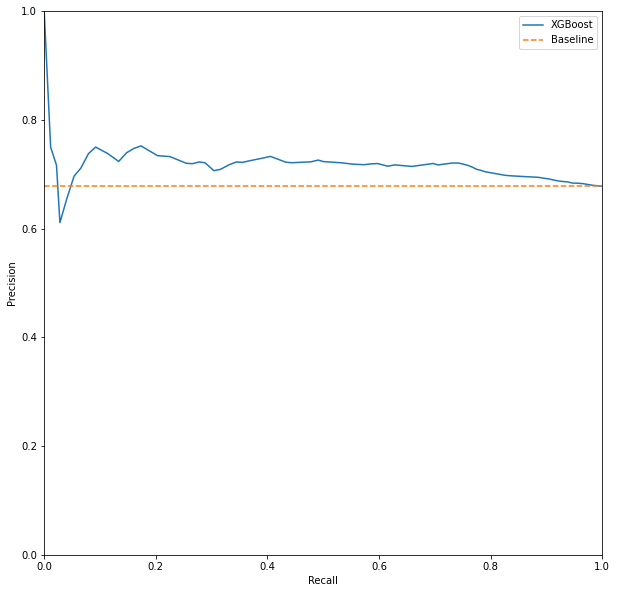

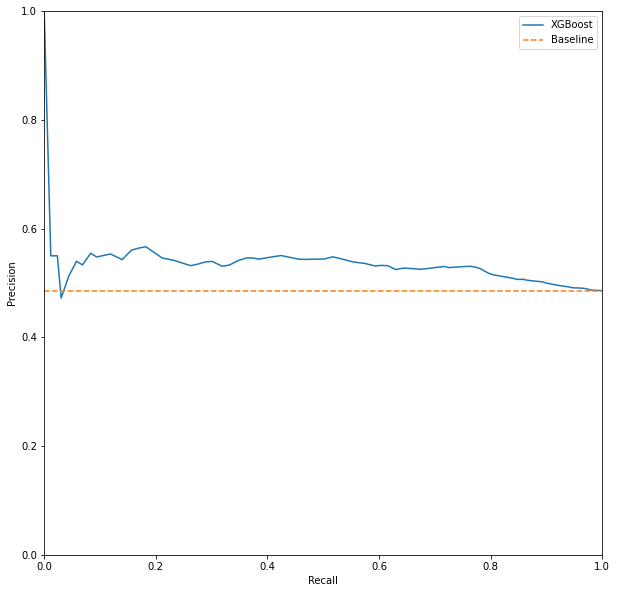

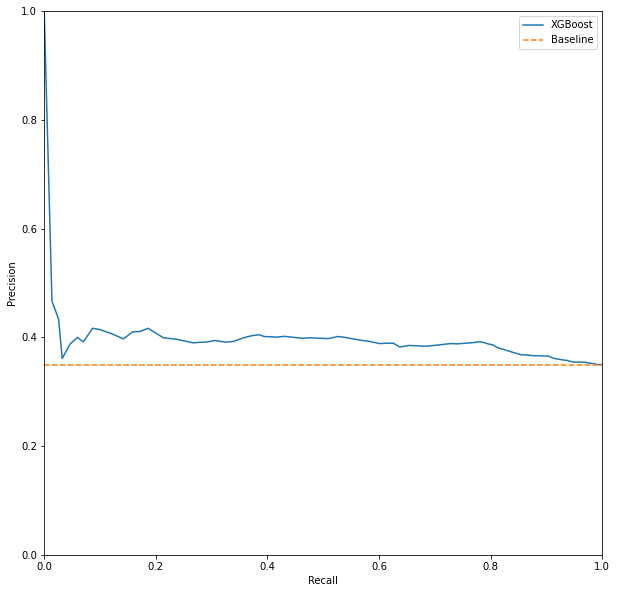

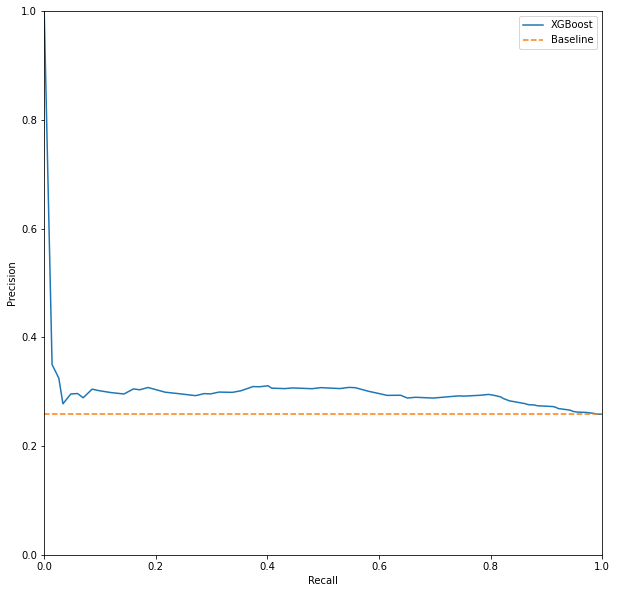

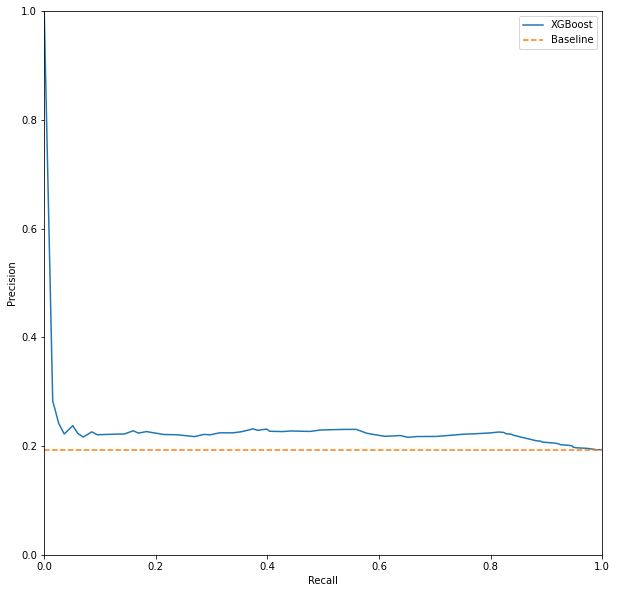

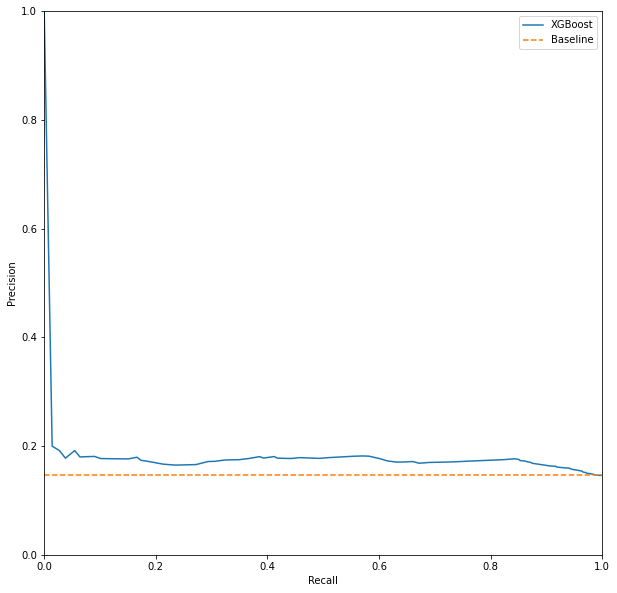

In [148]:
pr_curve(0, scores)
pr_curve(1, scores)
pr_curve(2, scores)
pr_curve(3, scores)
pr_curve(4, scores)
pr_curve(5, scores)

In [63]:
importances = [model.feature_importances_ for model in models[1:3]]

In [69]:
np.array(importances).mean(axis=0).argsort()[-10:][::-1]

array([50, 45, 69, 38, 43, 98, 32, 39, 61, 44])

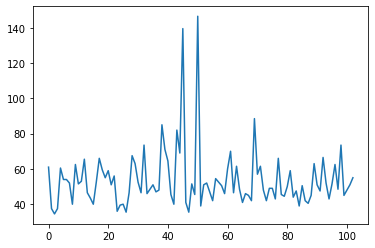

In [73]:
plt.plot(np.array(importances).mean(axis=0))

In [26]:
np.array(importances).mean()

3.2657278712509146

In [152]:
model.feature_importances_.argsort()[-20:][::-1]

array([372, 361, 470,  58, 475, 367, 420, 161, 414, 265, 166,  63, 269,
       264, 204, 302, 362, 307, 288, 300])

In [546]:
importances = model.feature_importances_.reshape(-1, 2)
max_importances = []
for importance in importances:
    if importance.mean() > 0:
        max_importances.append(importance.argmax())
        
np.unique(np.array(max_importances), return_counts=True)

(array([0, 1]), array([59, 62]))

In [45]:
model.feature_importances_.reshape(-1, 2).mean(axis=0)

array([17.34900285, 16.93589744])

In [511]:
model.feature_importances_[:-1].reshape(2, -1).argmax(axis=0).mean()

0.07119741100323625

In [526]:
np.append(y_train, y_test).mean()

3.2957394353970626

In [250]:
X_train.shape[1]/2

631.0

In [252]:
model.feature_importances_[13+631:13+618+631].reshape(103, 6).mean(axis=0)
# model.feature_importances_[psd_start:psd_end].reshape(103, 6).sum(axis=-1).argsort()[-10:][::-1]

array([2.32038835, 2.53398058, 2.11650485, 2.21359223, 2.74757282,
       2.68932039])

In [132]:
model.feature_importances_[3:621].reshape(103, 6).mean(axis=0)

array([108.78640777, 119.31067961, 114.80582524, 110.0776699 ,
       114.32038835, 106.72815534])

In [404]:
model.feature_importances_[psd_start:psd_end].reshape(103, 6)[:, 5].argsort()[-10:][::-1]

array([47, 24, 48, 57, 67, 50, 65, 36, 56, 44])

In [99]:
#corr_start = 0
#corr_end = 114
#model.feature_importances_[corr_start:corr_end][model.feature_importances_[corr_start:corr_end].argsort()[-10:][::-1]]

psd_start = 106
psd_end = psd_start + 618
model.feature_importances_[psd_start:psd_end][model.feature_importances_[psd_start:psd_end].argsort()[-10:][::-1]]

array([267, 220, 213, 211, 157, 150, 147, 146, 130, 130], dtype=int32)

In [6]:
###### def rmsle(predt: np.ndarray, dtrain: xgb.DMatrix) -> Tuple[str, float]:
#     ''' Root mean squared log error metric.'''
#     y = dtrain.get_label()
#     predt[predt < -1] = -1 + 1e-6
#     elements = np.power(np.log1p(y) - np.log1p(predt), 2)
#     return 'PyRMSLE', float(np.sqrt(np.sum(elements) / len(y)))

def recall_at_precision(y_true, y_pred):
    
    precision, recall, thresholds = precision_recall_curve(y_true > thresh, y_pred)
    precision_of_60 = np.argmax(precision>0.6)
    rec_at_prec = recall[precision_of_60]
    
    return 'rec_at_prec', rec_at_prec, True    
    
def auprc(y_true, y_pred):
    auprc = average_precision_score(y_true > thresh, y_pred)
    return 'auprc', auprc, True

def auroc(y_true, y_pred):
    auroc = roc_auc_score(y_true > thresh, y_pred)
    return 'auroc', auroc, True

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.5, shuffle=False)

In [29]:
# X_train, X_test = X_train_detected[:14400], X_train_detected[14400:19440]
# y_train, y_test = y_train[:14400], y_train[14400:19440]

# X_train, X_test = X_train_detected[:14400], X_train_detected[18000:21600]
# y_train, y_test = y_train[:14400], y_train[18000:21600]

X_train, X_test = X_train_detected[:50400], X_train_detected[54000:72000]
y_train, y_test = y_train[:50400], y_train[54000:72000]

In [57]:
scores

[defaultdict(collections.OrderedDict,
             {'valid_0': OrderedDict([('auprc', 0.35326498868421363),
                           ('auroc', 0.5617710278507305)])}),
 defaultdict(collections.OrderedDict,
             {'valid_0': OrderedDict([('auprc', 0.37397107789948547),
                           ('auroc', 0.6080465734036766)])}),
 defaultdict(collections.OrderedDict,
             {'valid_0': OrderedDict([('auprc', 0.2750794930580768),
                           ('auroc', 0.5800099372770877)])}),
 defaultdict(collections.OrderedDict,
             {'valid_0': OrderedDict([('auprc', 0.2521580996409872),
                           ('auroc', 0.5162243133815066)])})]

In [10]:
scores

[defaultdict(collections.OrderedDict,
             {'valid_0': OrderedDict([('auprc', 0.45859983553628075),
                           ('auroc', 0.6736779266234609)])}),
 defaultdict(collections.OrderedDict,
             {'valid_0': OrderedDict([('auprc', 0.4820193853421301),
                           ('auroc', 0.7016942534471924)])}),
 defaultdict(collections.OrderedDict,
             {'valid_0': OrderedDict([('auprc', 0.4080792987930819),
                           ('auroc', 0.7098476448161357)])}),
 defaultdict(collections.OrderedDict,
             {'valid_0': OrderedDict([('auprc', 0.4358711659300701),
                           ('auroc', 0.7317716764297328)])})]

In [ ]:
1.0096182664818953
0.9311643570574357
1.0291601411829767
1.8028086692454757

In [20]:
from lightgbm import LGBMRegressor
hyper_params = {
    'objective': 'regression',
    'task': 'train',
    'boosting_type': 'gbdt',
    'metric': [auprc],
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000,
    "n_estimators": 1000
}

scores = []
models = []

# max_index = 72000
max_index = 22000
folds = 4
thresh = 3

for i in range(folds):
    
    X_train_fold = np.concatenate((X_train_detected[:i*int(max_index/folds)], \
                                   X_train_detected[(i+1)*int(max_index/folds):max_index]), axis=0)
    X_test_fold = X_train_detected[i*int(max_index/folds):(i+1)*int(max_index/folds)]
    y_train_fold = np.concatenate((y_train[:i*int(max_index/folds)], \
                                   y_train[(i+1)*int(max_index/folds):max_index]), axis=0)
    y_test_fold = y_train[i*int(max_index/folds):(i+1)*int(max_index/folds)]
    
    #     delta_alpha = X_test_fold[:, 111:111+108].reshape(-1, 6)[:, [0, 2]].mean(axis=0)
    #     delta_alpha = X_test_fold[:, 13:13+108].reshape(-1, 6)[:, [0, 2]].mean(axis=0)
    
    #     print(delta_alpha[1] / delta_alpha[0])
    
    
    model = LGBMRegressor(**hyper_params)
    
    eval_set = [(X_test_fold, y_test_fold)]

    fitted_model = model.fit(X_train_fold, y_train_fold, eval_metric=[auprc, auroc], \
              early_stopping_rounds=200, eval_set=eval_set, \
              verbose=True)
    
    scores.append(fitted_model.best_score_)
    models.append(fitted_model)

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Unknown parameter: auprc
[LightGBM] [Warning] Unknown parameter: at
[LightGBM] [Warning] Unknown parameter: 0x16fc90430>
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] Unknown parameter: at
[LightGBM] [Warning] Unknown parameter: 0x16fc90430>
[LightGBM] [Warning] Unknown parameter: auprc
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Wa

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[52]	valid_0's auprc: 0.119898	valid_0's auroc: 0.670296
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[53]	valid_0's auprc: 0.120502	valid_0's auroc: 0.670555
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[54]	valid_0's auprc: 0.120383	valid_0's auroc: 0.670239
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[55]	valid_0's auprc: 0.12061	valid_0's auroc: 0.669773
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[56]	valid_0's auprc: 0.11991	valid_0's auroc: 0.668368
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[57]	valid_0's auprc: 0.120647	valid_0's auroc: 0.669587
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[58]	valid_0's auprc: 0.120797	valid_0's auroc: 0.670139
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[59

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[115]	valid_0's auprc: 0.121882	valid_0's auroc: 0.656683
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[116]	valid_0's auprc: 0.123411	valid_0's auroc: 0.660977
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[117]	valid_0's auprc: 0.123338	valid_0's auroc: 0.661286
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[118]	valid_0's auprc: 0.123549	valid_0's auroc: 0.661489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[119]	valid_0's auprc: 0.123453	valid_0's auroc: 0.661712
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[120]	valid_0's auprc: 0.123277	valid_0's auroc: 0.661455
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[121]	valid_0's auprc: 0.124101	valid_0's auroc: 0.661072
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[179]	valid_0's auprc: 0.118059	valid_0's auroc: 0.649909
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[180]	valid_0's auprc: 0.117858	valid_0's auroc: 0.649525
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[181]	valid_0's auprc: 0.11724	valid_0's auroc: 0.648365
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[182]	valid_0's auprc: 0.116644	valid_0's auroc: 0.64934
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[183]	valid_0's auprc: 0.116403	valid_0's auroc: 0.64834
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[184]	valid_0's auprc: 0.116504	valid_0's auroc: 0.648305
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[185]	valid_0's auprc: 0.116264	valid_0's auroc: 0.648201
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Unknown parameter: auprc
[LightGBM] [Warning] Unknown parameter: at
[LightGBM] [Warning] Unknown parameter: 0x16fc90430>
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] Unknown parameter: at
[LightGBM] [Warning] Unknown parameter: 0x16fc90430>
[LightGBM] [Warning] Unknown parameter: auprc
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Wa

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[52]	valid_0's auprc: 0.0502049	valid_0's auroc: 0.601857
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[53]	valid_0's auprc: 0.0505334	valid_0's auroc: 0.604889
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[54]	valid_0's auprc: 0.0507355	valid_0's auroc: 0.604855
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[55]	valid_0's auprc: 0.0505658	valid_0's auroc: 0.604497
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[56]	valid_0's auprc: 0.0505687	valid_0's auroc: 0.603946
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[57]	valid_0's auprc: 0.0505329	valid_0's auroc: 0.604079
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[58]	valid_0's auprc: 0.0505821	valid_0's auroc: 0.603707
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[115]	valid_0's auprc: 0.0502027	valid_0's auroc: 0.590393
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[116]	valid_0's auprc: 0.0505754	valid_0's auroc: 0.593845
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[117]	valid_0's auprc: 0.050681	valid_0's auroc: 0.594898
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[118]	valid_0's auprc: 0.050738	valid_0's auroc: 0.59518
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[119]	valid_0's auprc: 0.0511926	valid_0's auroc: 0.598692
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[120]	valid_0's auprc: 0.0512901	valid_0's auroc: 0.598075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[121]	valid_0's auprc: 0.0512859	valid_0's auroc: 0.597296
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[179]	valid_0's auprc: 0.0500182	valid_0's auroc: 0.606146
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[180]	valid_0's auprc: 0.0502441	valid_0's auroc: 0.60768
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[181]	valid_0's auprc: 0.0501459	valid_0's auroc: 0.606471
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[182]	valid_0's auprc: 0.0501362	valid_0's auroc: 0.607597
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[183]	valid_0's auprc: 0.0501304	valid_0's auroc: 0.606493
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[184]	valid_0's auprc: 0.0503733	valid_0's auroc: 0.607983
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[185]	valid_0's auprc: 0.0501692	valid_0's auroc: 0.60596
[LightGBM] [Warning] No further splits with positive gain, best 

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Unknown parameter: auprc
[LightGBM] [Warning] Unknown parameter: at
[LightGBM] [Warning] Unknown parameter: 0x16fc90430>
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] Unknown parameter: at
[LightGBM] [Warning] Unknown parameter: 0x16fc90430>
[LightGBM] [Warning] Unknown parameter: auprc
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Wa

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[50]	valid_0's auprc: 0.0866088	valid_0's auroc: 0.651163
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[51]	valid_0's auprc: 0.0874566	valid_0's auroc: 0.65163
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[52]	valid_0's auprc: 0.0871859	valid_0's auroc: 0.651644
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[53]	valid_0's auprc: 0.0864163	valid_0's auroc: 0.650422
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[54]	valid_0's auprc: 0.0870299	valid_0's auroc: 0.651821
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[55]	valid_0's auprc: 0.086827	valid_0's auroc: 0.649198
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[56]	valid_0's auprc: 0.0869531	valid_0's auroc: 0.649144
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[113]	valid_0's auprc: 0.0860008	valid_0's auroc: 0.628881
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[114]	valid_0's auprc: 0.0853515	valid_0's auroc: 0.6284
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[115]	valid_0's auprc: 0.085698	valid_0's auroc: 0.62864
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[116]	valid_0's auprc: 0.0857316	valid_0's auroc: 0.628423
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[117]	valid_0's auprc: 0.0855123	valid_0's auroc: 0.627121
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[118]	valid_0's auprc: 0.0855811	valid_0's auroc: 0.628063
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[119]	valid_0's auprc: 0.0857101	valid_0's auroc: 0.627862
[LightGBM] [Warning] No further splits with positive gain, best ga

[174]	valid_0's auprc: 0.0849762	valid_0's auroc: 0.621794
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[175]	valid_0's auprc: 0.0850494	valid_0's auroc: 0.621168
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[176]	valid_0's auprc: 0.0854786	valid_0's auroc: 0.620992
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[177]	valid_0's auprc: 0.0854477	valid_0's auroc: 0.620404
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[178]	valid_0's auprc: 0.0855449	valid_0's auroc: 0.620805
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[179]	valid_0's auprc: 0.0855156	valid_0's auroc: 0.619646
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[180]	valid_0's auprc: 0.0855067	valid_0's auroc: 0.619031
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[181]	valid_0's auprc: 0.085371	valid_0's auroc: 0.618611
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[236]	valid_0's auprc: 0.082642	valid_0's auroc: 0.616642
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[237]	valid_0's auprc: 0.0823294	valid_0's auroc: 0.616756
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[238]	valid_0's auprc: 0.0822979	valid_0's auroc: 0.616859
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[239]	valid_0's auprc: 0.0822247	valid_0's auroc: 0.617464
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[240]	valid_0's auprc: 0.0823293	valid_0's auroc: 0.617572
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[241]	valid_0's auprc: 0.0822397	valid_0's auroc: 0.617039
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[242]	valid_0's auprc: 0.0820317	valid_0's auroc: 0.61655
[LightGBM] [Warning] No further splits with positive gain, best 

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Unknown parameter: auprc
[LightGBM] [Warning] Unknown parameter: at
[LightGBM] [Warning] Unknown parameter: 0x16fc90430>
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] Unknown parameter: at
[LightGBM] [Warning] Unknown parameter: 0x16fc90430>
[LightGBM] [Warning] Unknown parameter: auprc
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Wa

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[51]	valid_0's auprc: 0.136072	valid_0's auroc: 0.561064
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[52]	valid_0's auprc: 0.136029	valid_0's auroc: 0.560947
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[53]	valid_0's auprc: 0.135756	valid_0's auroc: 0.558903
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[54]	valid_0's auprc: 0.136018	valid_0's auroc: 0.55906
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[55]	valid_0's auprc: 0.136649	valid_0's auroc: 0.561211
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[56]	valid_0's auprc: 0.136537	valid_0's auroc: 0.560923
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[57]	valid_0's auprc: 0.13675	valid_0's auroc: 0.561401
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[58

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[114]	valid_0's auprc: 0.137538	valid_0's auroc: 0.558019
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[115]	valid_0's auprc: 0.137618	valid_0's auroc: 0.558054
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[116]	valid_0's auprc: 0.13777	valid_0's auroc: 0.557566
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[117]	valid_0's auprc: 0.137355	valid_0's auroc: 0.557059
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[118]	valid_0's auprc: 0.137532	valid_0's auroc: 0.55787
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[119]	valid_0's auprc: 0.137189	valid_0's auroc: 0.556643
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[120]	valid_0's auprc: 0.137505	valid_0's auroc: 0.558114
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[180]	valid_0's auprc: 0.136222	valid_0's auroc: 0.556901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[181]	valid_0's auprc: 0.136513	valid_0's auroc: 0.556298
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[182]	valid_0's auprc: 0.136337	valid_0's auroc: 0.555176
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[183]	valid_0's auprc: 0.136303	valid_0's auroc: 0.55517
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[184]	valid_0's auprc: 0.136151	valid_0's auroc: 0.55503
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[185]	valid_0's auprc: 0.136144	valid_0's auroc: 0.555163
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[186]	valid_0's auprc: 0.136477	valid_0's auroc: 0.555733
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [ ]:
k_cum_fold_scores = []
k_cum_fold_models = []
k_cum_fold_preds = []

folds = 5
max_index = folds * (X_trainval.shape[0] // folds)

for i in range(1, folds):
    
    X_trainval_fold = X_trainval[:i*int(max_index/folds)]
    y_trainval_fold = y_trainval[:i*int(max_index/folds)]
    X_trainval_fold = add_detections(X_trainval_fold, y_trainval_fold, seconds_list=[60, 300])
    
    X_test_fold = X_trainval[i*int(max_index/folds):(i+1)*int(max_index/folds)]
    y_test_fold = y_trainval[i*int(max_index/folds):(i+1)*int(max_index/folds)]
    X_test_fold = add_detections(X_test_fold, y_test_fold, seconds_list=[60, 300])
    
    X_train_fold, X_val_fold, y_train_fold, y_val_fold = train_test_split(X_trainval_fold, y_trainval_fold, \
                                                                          test_size=0.2, shuffle=True)
    
    #     delta_alpha = X_test_fold[:, 111:111+108].reshape(-1, 6)[:, [0, 2]].mean(axis=0)
    #     delta_alpha = X_test_fold[:, 13:13+108].reshape(-1, 6)[:, [0, 2]].mean(axis=0)
    
    #     print(delta_alpha[1] / delta_alpha[0])
    
    
    chosen_model = train_and_optimise(X_train_fold, y_train_fold, X_val_fold, y_val_fold, n_trials=3)
    
    curr_scores = []
    curr_preds = []

    for seed in seeds:
        model = LGBMRegressor(**fixed_params, **chosen_model.best_params, metric="custom", seed=seed)
        eval_set = [(X_val_fold, y_val_fold)]
        
        model.fit(X_train_fold, y_train_fold, eval_metric=[auroc], \
                  early_stopping_rounds=100, eval_set=eval_set, \
                  verbose=False)
        
        curr_scores.append(roc_auc_score(y_test_fold > thresh, model.predict(X_test_fold)))
        curr_preds.append(model.predict(X_test_fold))
        
    k_cum_fold_scores.append(curr_scores)
    k_cum_fold_models.append(chosen_model)
    k_cum_fold_preds.append(curr_preds)

In [57]:
(2 + 3) // 2

2

In [ ]:
k_fold_scores = []
k_fold_models = []
k_fold_preds = []

folds = 5
max_index = folds * (X_trainval.shape[0] // folds)

for i in range(folds):
    
    X_trainval_fold = np.concatenate((X_trainval[:i*int(max_index/folds)], \
                                      X_trainval[(i+1)*int(max_index/folds):max_index]), axis=0)
    y_trainval_fold = np.concatenate((y_trainval[:i*int(max_index/folds)], \
                                      y_trainval[(i+1)*int(max_index/folds):max_index]), axis=0)
    X_trainval_fold = add_detections(X_trainval_fold, y_trainval_fold, seconds_list=[60, 300])
    
    X_test_fold = X_trainval[i*int(max_index/folds):(i+1)*int(max_index/folds)]
    y_test_fold = y_trainval[i*int(max_index/folds):(i+1)*int(max_index/folds)]
    X_test_fold = add_detections(X_test_fold, y_test_fold, seconds_list=[60, 300])
    
    X_train_fold, X_val_fold, y_train_fold, y_val_fold = train_test_split(X_trainval_fold, y_trainval_fold, \
                                                                          test_size=0.2, shuffle=True)
    
    #     delta_alpha = X_test_fold[:, 111:111+108].reshape(-1, 6)[:, [0, 2]].mean(axis=0)
    #     delta_alpha = X_test_fold[:, 13:13+108].reshape(-1, 6)[:, [0, 2]].mean(axis=0)
    
    #     print(delta_alpha[1] / delta_alpha[0])
    
    chosen_model = train_and_optimise(X_train_fold, y_train_fold, X_val_fold, y_val_fold, n_trials=3)
    
    curr_scores = []
    curr_preds = []
    
    for seed in seeds:
        model = LGBMRegressor(**fixed_params, **chosen_model.best_params, metric="custom", seed=seed)
        eval_set = [(X_val_fold, y_val_fold)]
        
        model.fit(X_train_fold, y_train_fold, eval_metric=[auroc], \
                  early_stopping_rounds=100, eval_set=eval_set, \
                  verbose=False)
        
        curr_scores.append(roc_auc_score(y_test_fold > thresh, model.predict(X_test_fold)))
        curr_preds.append(model.predict(X_test_fold))
        
    k_fold_scores.append(curr_scores)
    k_fold_models.append(chosen_model)
    k_fold_preds.append(curr_preds)

In [16]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((50400, 1950), (50400,), (18000, 1950), (18000,))

In [37]:
(y_test > 0).sum() / len(y_test)

0.6641666666666667

In [49]:
thresh = 5

def objective(trial):
    
    hyper_params = {
#         "objective": "quantile",
        "objective": "regression",
        "task": "train",
        "eval_metric": [auroc],
        "boosting_type": "gbdt",
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "max_bin": trial.suggest_int("max_bin", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "num_iterations": 100000,
    }

#     eval_set = [(X_test_detected, y_test)]
    eval_set = [(X_val_detected, y_val)]
    
    model = LGBMRegressor(**hyper_params, metric="custom")
    
    model.fit(X_train_detected, y_train, eval_metric=[auroc], \
          early_stopping_rounds=100, eval_set=eval_set, \
          verbose=True)

    roc_auc = roc_auc_score(y_val > thresh, model.predict(X_val_detected))
    
    print("Test", roc_auc_score(y_test > thresh, model.predict(X_test_detected)))
    
    return roc_auc

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=2)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2021-08-25 15:45:35,754] A new study created in memory with name: no-name-e0384438-c000-4283-abf2-78231b3ca0b4
/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auroc: 0.653839
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auroc: 0.664391
[3]	valid_0's auroc: 0.668916
[4]	valid_0's auroc: 0.670626
[5]	valid_0's auroc: 0.671592
[6]	valid_0's auroc: 0.672192
[7]	valid_0's auroc: 0.674769
[8]	valid_0's auroc: 0.674097
[9]	valid_0's auroc: 0.675092
[10]	valid_0's auroc: 0.673824
[11]	valid_0's auroc: 0.674714
[12]	valid_0's auroc: 0.675126
[13]	valid_0's auroc: 0.67527
[14]	valid_0's auroc: 0.675627
[15]	valid_0's auroc: 0.676108
[16]	valid_0's auroc: 0.677332
[17]	valid_0's auroc: 0.67835
[18]	valid_0's auroc: 0.678357
[19]	valid_0's auroc: 0.679061
[20]	valid_0's auroc: 0.679895
[21]	valid_0's auroc: 0.679509
[22]	valid_0's auroc: 0.679405
[23]	valid_0's auroc: 0.68029
[24]	valid_0's auroc: 0.681259
[25]	valid_0's auroc: 0.68119
[26]	valid_0's auroc: 0.680175
[27]	valid_0's auroc: 0.680212
[28]	valid_0's auroc: 0.680673
[29]	valid_0's auroc: 0.68093
[30]	valid_0's auroc: 0.681183
[31]	valid_0's auroc: 

KeyboardInterrupt: 

All features: Trial 50 finished with value: 0.7907001369783229 and parameters: {'learning_rate': 0.0046447869686516065, 'lambda_l1': 3.6836176584630054e-05, 'lambda_l2': 0.01948608314020931, 'num_leaves': 166, 'max_bin': 56, 'feature_fraction': 0.8007641019864291, 'bagging_fraction': 0.515703689837724, 'bagging_freq': 6, 'min_child_samples': 96}. Best is trial 42 with value: 0.8021061631089165.

Just IED counts:
Number of finished trials: 100
Best trial:
  Value: 0.7889547172364711
  Params: 
    learning_rate: 0.06455916601770573
    lambda_l1: 4.337992777644346e-06
    lambda_l2: 5.988852204911169e-08
    num_leaves: 17
    max_bin: 230
    feature_fraction: 0.9399864649244769
    bagging_fraction: 0.9970003652709338
    bagging_freq: 3
    min_child_samples: 7
In [60]:


In [60]:
from lightgbm import LGBMRegressor

import time

start = time.time()

thresh = 0

hyper_params = {
    'objective': 'regression',
    'task': 'train',
    'boosting_type': 'gbdt',
#     'metric': [auprc],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 256,  
    "max_bin": 8,
    "num_iterations": 100000,
    "n_estimators": 1000
}

model = LGBMRegressor(**hyper_params)

eval_set = [(X_test_detected, y_test)]

model.fit(X_train_detected, y_train, eval_metric=[auprc, auroc], \
          early_stopping_rounds=200, eval_set=eval_set, \
          verbose=True)

# eval_set = [(X_test, y_test)]

# model.fit(X_train, y_train, eval_metric=auprc, \
#           early_stopping_rounds=200, eval_set=eval_set, \
#           verbose=True)

print(time.time() - start)

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056461 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[47]	valid_0's l2: 74.3452	valid_0's auprc: 0.42078	valid_0's auroc: 0.789868
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[48]	valid_0's l2: 74.3291	valid_0's auprc: 0.420146	valid_0's auroc: 0.789802
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[49]	valid_0's l2: 74.3115	valid_0's auprc: 0.419084	valid_0's auroc: 0.789721
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[50]	valid_0's l2: 74.2951	valid_0's auprc: 0.418482	valid_0's auroc: 0.789822
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[51]	valid_0's l2: 74.2688	valid_0's auprc: 0.419586	valid_0's auroc: 0.790003
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[52]	valid_0's l2: 74.2414	valid_0's auprc: 0.420722	valid_0's auroc: 0.790356
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[101]	valid_0's l2: 73.1422	valid_0's auprc: 0.431651	valid_0's auroc: 0.793819
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[102]	valid_0's l2: 73.1032	valid_0's auprc: 0.432949	valid_0's auroc: 0.794082
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[103]	valid_0's l2: 73.0809	valid_0's auprc: 0.433286	valid_0's auroc: 0.794187
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[104]	valid_0's l2: 73.0522	valid_0's auprc: 0.433827	valid_0's auroc: 0.794382
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[105]	valid_0's l2: 73.0327	valid_0's auprc: 0.433951	valid_0's auroc: 0.794477
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[106]	valid_0's l2: 73.0154	valid_0's auprc: 0.433886	valid_0's auroc: 0.794483
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[155]	valid_0's l2: 72.1425	valid_0's auprc: 0.442141	valid_0's auroc: 0.795701
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[156]	valid_0's l2: 72.1321	valid_0's auprc: 0.442022	valid_0's auroc: 0.795639
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[157]	valid_0's l2: 72.1251	valid_0's auprc: 0.441806	valid_0's auroc: 0.79566
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[158]	valid_0's l2: 72.1158	valid_0's auprc: 0.441812	valid_0's auroc: 0.795751
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[159]	valid_0's l2: 72.1086	valid_0's auprc: 0.441652	valid_0's auroc: 0.795819
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[160]	valid_0's l2: 72.0988	valid_0's auprc: 0.441595	valid_0's auroc: 0.795845
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[209]	valid_0's l2: 71.4995	valid_0's auprc: 0.447351	valid_0's auroc: 0.794352
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[210]	valid_0's l2: 71.481	valid_0's auprc: 0.447275	valid_0's auroc: 0.794306
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[211]	valid_0's l2: 71.4778	valid_0's auprc: 0.447131	valid_0's auroc: 0.794224
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[212]	valid_0's l2: 71.4738	valid_0's auprc: 0.447122	valid_0's auroc: 0.794255
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[213]	valid_0's l2: 71.4602	valid_0's auprc: 0.447079	valid_0's auroc: 0.794148
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[214]	valid_0's l2: 71.4532	valid_0's auprc: 0.446992	valid_0's auroc: 0.794042
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[263]	valid_0's l2: 71.0855	valid_0's auprc: 0.447891	valid_0's auroc: 0.791945
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[264]	valid_0's l2: 71.0828	valid_0's auprc: 0.447834	valid_0's auroc: 0.791772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[265]	valid_0's l2: 71.083	valid_0's auprc: 0.447607	valid_0's auroc: 0.791751
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[266]	valid_0's l2: 71.0814	valid_0's auprc: 0.447488	valid_0's auroc: 0.79152
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[267]	valid_0's l2: 71.0836	valid_0's auprc: 0.447361	valid_0's auroc: 0.791313
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[268]	valid_0's l2: 71.0831	valid_0's auprc: 0.447133	valid_0's auroc: 0.791062
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[269]	valid_0's l2: 71.0815	valid_0's auprc: 0.446945	valid_0's auroc: 0

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[319]	valid_0's l2: 70.8316	valid_0's auprc: 0.448415	valid_0's auroc: 0.789514
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[320]	valid_0's l2: 70.8267	valid_0's auprc: 0.448607	valid_0's auroc: 0.789631
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[321]	valid_0's l2: 70.8243	valid_0's auprc: 0.448715	valid_0's auroc: 0.789675
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[322]	valid_0's l2: 70.8206	valid_0's auprc: 0.448658	valid_0's auroc: 0.789672
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[323]	valid_0's l2: 70.8186	valid_0's auprc: 0.448715	valid_0's auroc: 0.789653
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[324]	valid_0's l2: 70.8135	valid_0's auprc: 0.448779	valid_0's auroc: 0.789658
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [28]:
# preds = model.predict(X_test)
preds = model.predict(X_test_detected)

In [29]:
average_precision_score(y_test > 0, preds)

0.4449202249774946

In [50]:
roc_auc_score(y_test > 0, preds)

NameError: name 'preds' is not defined

In [32]:
X_test.shape

(16560, 1404)

0.4001064112795956 0.5503110135382364


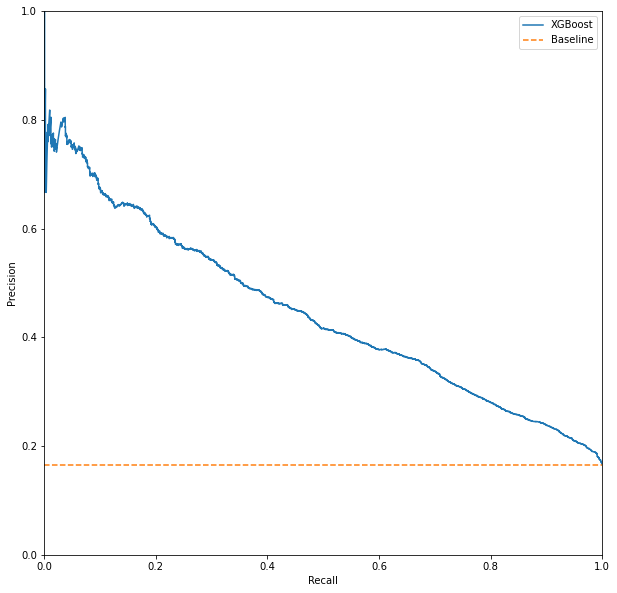

0.40010245901639346 0.4382716049382716


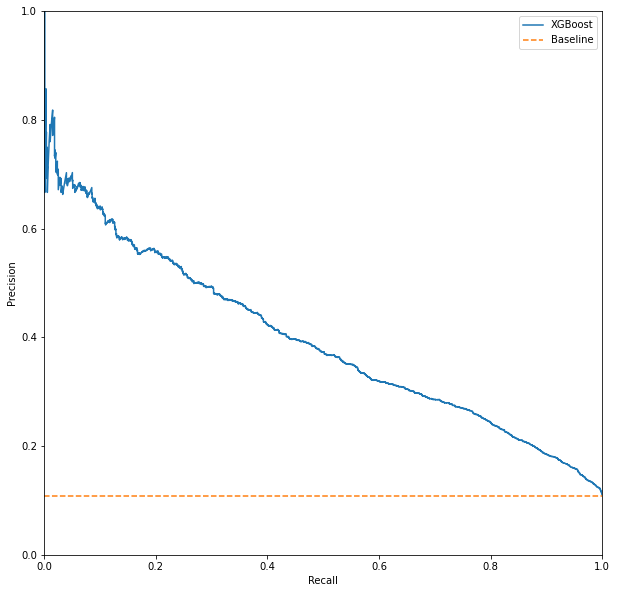

In [33]:
from sklearn.metrics import precision_recall_curve
import matplotlib

matplotlib.rcParams['figure.figsize'] = (10, 10)

def pr_curve(thresh, preds):
    precision, recall, thresholds = precision_recall_curve(y_test > thresh, preds)
    
    precision_of_60 = np.argmax(precision>0.4)
    print(precision[precision_of_60], recall[precision_of_60])

    plt.plot(recall, precision, label='XGBoost')

    baseline = len(y_test[y_test > thresh]) / len(y_test)
    plt.plot([0, 1], [baseline, baseline], linestyle='--', label='Baseline')

    plt.legend()
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.show()
    
pr_curve(0, preds)
pr_curve(1, preds)
# pr_curve(2, preds)
# pr_curve(3, preds)
# pr_curve(4, preds)
# pr_curve(5, preds)

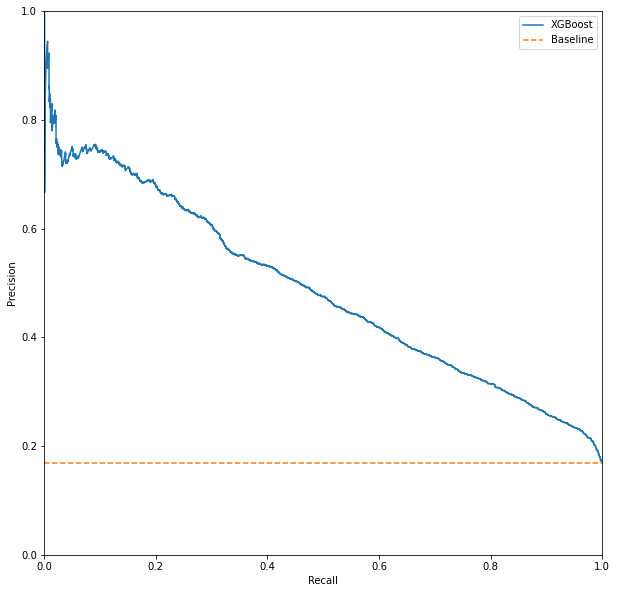

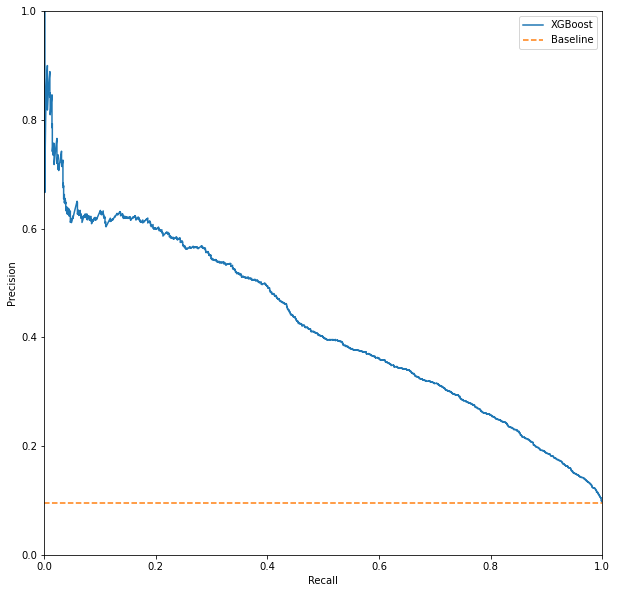

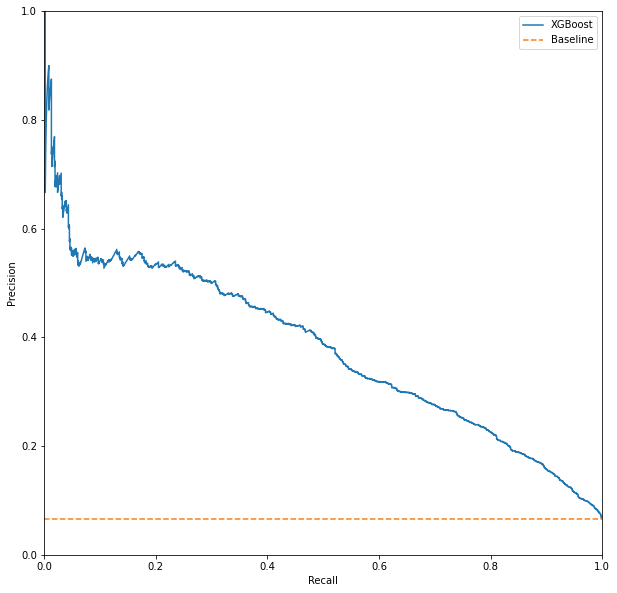

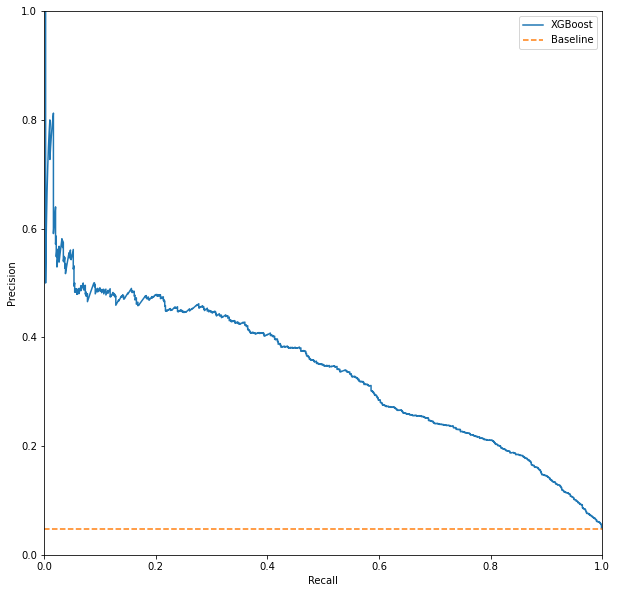

In [564]:
from sklearn.metrics import precision_recall_curve
matplotlib.rcParams['figure.figsize'] = (10, 10)

def pr_curve(thresh, preds):
    precision, recall, thresholds = precision_recall_curve(y_test > thresh, preds)

    plt.plot(recall, precision, label='XGBoost')

    baseline = len(y_test[y_test > thresh]) / len(y_test)
    plt.plot([0, 1], [baseline, baseline], linestyle='--', label='Baseline')

    plt.legend()
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.show()
    
pr_curve(0, preds)
pr_curve(1, preds)
pr_curve(2, preds)
pr_curve(3, preds)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

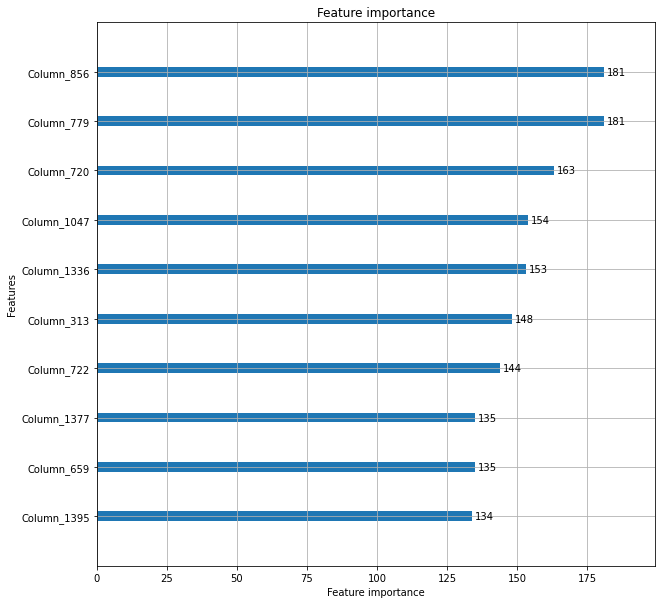

In [47]:
lgb.plot_importance(model, max_num_features=10)#, importance_type='gain')

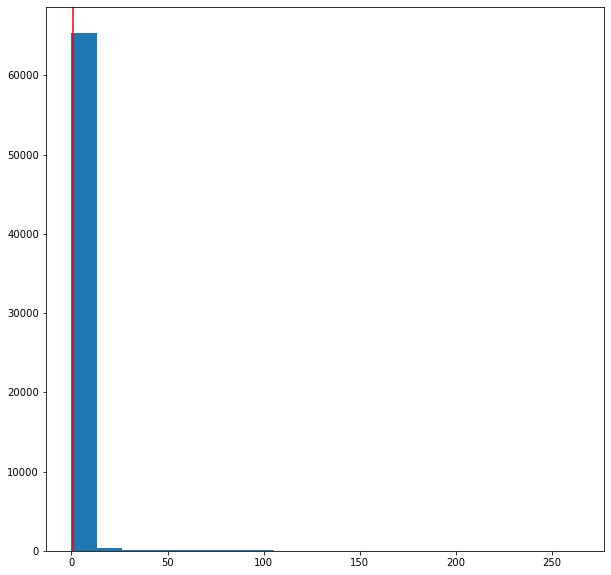

In [49]:
plt.hist(y_train, bins=20)
plt.axvline(x=1, color='red')

In [153]:
import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

space={'max_depth': hp.quniform("max_depth", 2, 10, 1),
       'gamma': hp.uniform ('gamma', 1,9),
       'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
       'reg_lambda' : hp.uniform('reg_lambda', 0,1),
       'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
       'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
       'n_estimators': 10000,
       'learning_rate' : hp.quniform('learning_rate', 1e-2, 1e-1, 1e-2),
      }

In [450]:
# X_train_appended = 
X_train_appended = np.vstack((X_train.swapaxes(0, 1), moving_aves_train)).swapaxes(0, 1)
X_test_appended = np.vstack((X_test.swapaxes(0, 1), moving_aves_test)).swapaxes(0, 1)

In [16]:
import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns

N = 300
cumsum, moving_aves2 = [0], []

for i, x in enumerate(model.predict(X_test), 1):
    cumsum.append(cumsum[i-1] + x)
    if i>=N:
        moving_ave = (cumsum[i] - cumsum[i-N])/N
    else:
        moving_ave = cumsum[i] / i
    moving_aves2.append(moving_ave)

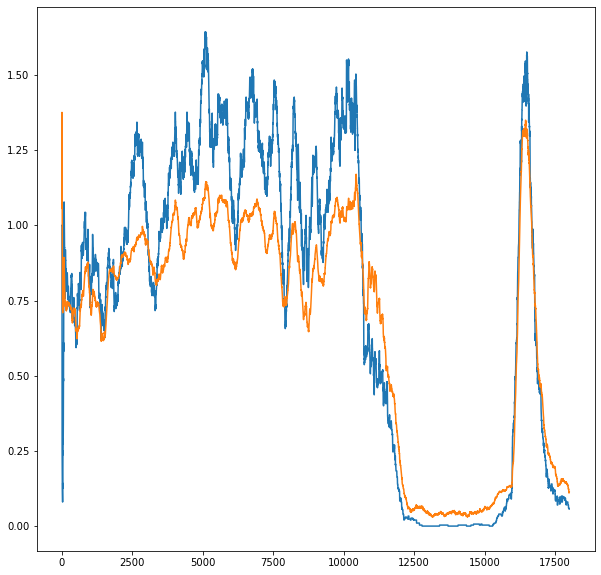

In [17]:
import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns

N = 300
cumsum, moving_aves = [0], []

for i, x in enumerate(y_test, 1):
    cumsum.append(cumsum[i-1] + x)
    if i>=N:
        moving_ave = (cumsum[i] - cumsum[i-N])/N
    else:
        moving_ave = cumsum[i] / i
    moving_aves.append(moving_ave)

plt.plot(moving_aves)
plt.plot(moving_aves2)

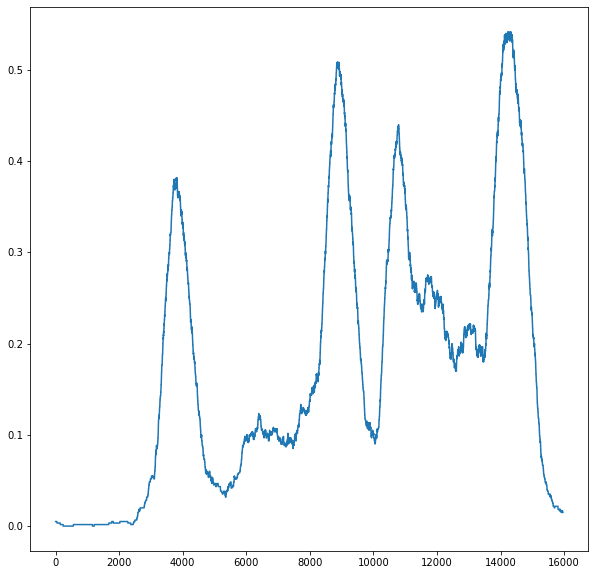

In [453]:
import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns

N = 600
cumsum, moving_aves = [0], []

for i, x in enumerate(y_test > 0, 1):
    cumsum.append(cumsum[i-1] + x)
    if i>=N:
        moving_ave = (cumsum[i] - cumsum[i-N])/N
        #can do stuff with moving_ave here
        moving_aves.append(moving_ave)

plt.plot(moving_aves)

In [424]:
import time

start = time.time()

for i in range(100):
    gbm.predict(np.expand_dims(X_test[0], 0))

print(time.time() - start)

0.07152295112609863


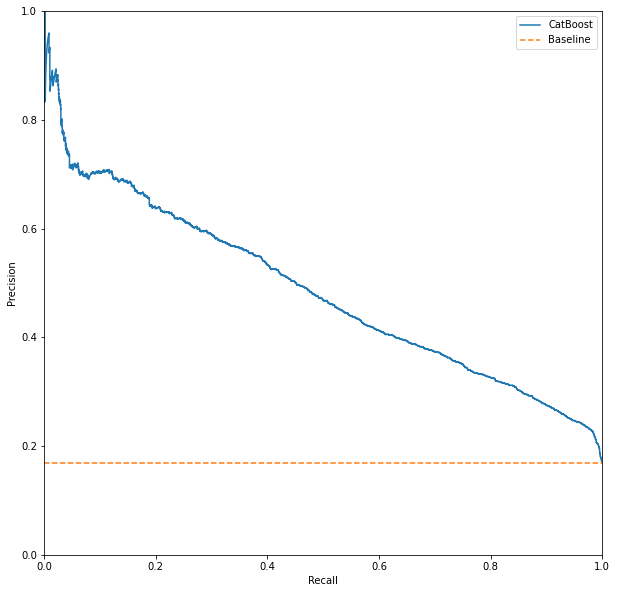

In [344]:
from sklearn.metrics import precision_recall_curve

matplotlib.rcParams['figure.figsize'] = (10, 10)

precision, recall, thresholds = precision_recall_curve(y_test > 0, model.predict_proba(X_test_detected)[:, 1])

plt.plot(recall, precision, label='CatBoost')

baseline = len(y_test[y_test > 0]) / len(y_test)
plt.plot([0, 1], [baseline, baseline], linestyle='--', label='Baseline')

plt.legend()
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

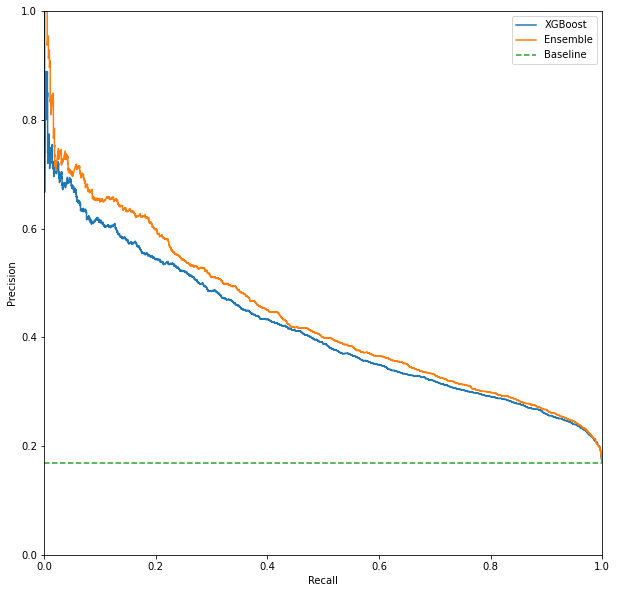

In [342]:
from sklearn.metrics import precision_recall_curve

matplotlib.rcParams['figure.figsize'] = (10, 10)

precision, recall, thresholds = precision_recall_curve(y_test > 0, model.predict_proba(X_test)[:, 1])

plt.plot(recall, precision, label='XGBoost')

precision, recall, thresholds = precision_recall_curve(y_test > 0, gbm.predict_proba(X_test)[:, 1])

plt.plot(recall, precision, label='Ensemble')

baseline = len(y_test[y_test > 0]) / len(y_test)
plt.plot([0, 1], [baseline, baseline], linestyle='--', label='Baseline')

plt.legend()
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

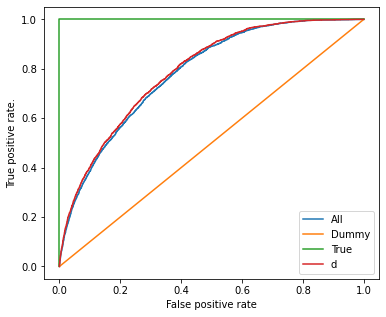

In [255]:
import matplotlib

matplotlib.rcParams['figure.figsize'] = (6, 5)

from sklearn.metrics import roc_curve
                             
def plotROC(tprs, fprs, labels=''):
    """
    Plot ROC curve from tpr and fpr.
    """
    for tpr, fpr, label in zip(tprs, fprs, labels):
        plt.plot(fpr, tpr, label=label)
        plt.plot()
        plt.legend()
        plt.ylabel('True positive rate.')
        plt.xlabel('False positive rate')
    plt.show()
    
ensemble_preds = (model.predict_proba(X_test)[:, 1] + gbm.predict_proba(X_test)[:, 1]) / 2

fpr1, tpr1, thresh = roc_curve(y_test > 0, selection_model.predict_proba(select_X_test)[:, 1])
fpr2, tpr2, thresh = roc_curve(y_test > 0, model.predict_proba(X_test)[:, 1])
fpr3, tpr3, thresh = roc_curve(y_test > 0, dummy.predict_proba(X_test)[:, 1])
fpr4, tpr4, thresh = roc_curve(y_test > 0, y_test > 0)
fpr5, tpr5, thresh = roc_curve(y_test > 0, ensemble_preds)
plotROC([tpr2, tpr3, tpr4, tpr5], [fpr2, fpr3, fpr4, fpr5], labels=['All', 'Dummy', 'True', 'd'])

In [347]:
thresh = 0.5

recall_score(gbm.predict_proba(X_test)[:, 1] > thresh, y_test > 0), \
precision_score(gbm.predict_proba(X_test)[:, 1] > thresh, y_test > 0)

(0.5980603448275862, 0.19949676491732565)

0.8079710144927537

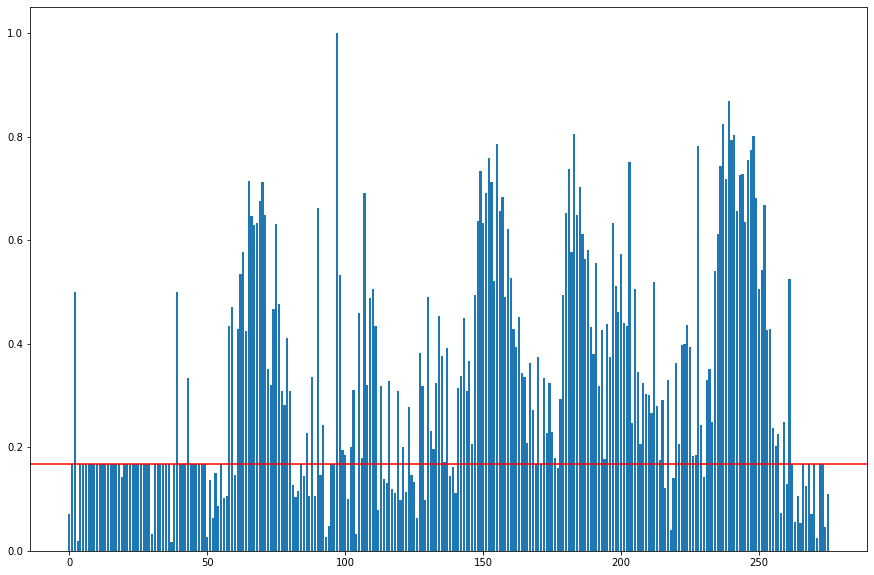

In [606]:
matplotlib.rcParams['figure.figsize'] = (15, 10)

baseline_score = (y_test > 0).mean()

roc_scores = []
for i in range(276):#len(y_test)):
    if (y_test[i * 60:(i+1) * 60] > 0).sum() == 0:
        roc_scores.append(baseline_score)
    else:
        roc_scores.append(average_precision_score(y_test[i * 60:(i+1) * 60] > 0, preds[i * 60:(i+1) * 60]))
plt.bar(range(len(roc_scores)), roc_scores)
plt.axhline(y=baseline_score, color='r', linestyle='-')

len([roc for roc in roc_scores if roc >= baseline_score]) / len(roc_scores)